In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [21]:
data_path  = "music_genre.csv"
data_df = pd.read_csv(data_path)

# remove certain columns that are not neccessary for our tutorial 
data_df = data_df.drop(["instance_id"],axis=1)

# remove rows with a duration length equal to -1.0
data_df = data_df[data_df.duration_ms != -1.0]
temp = data_df.sample(n = 20)
temp

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
49487,A$AP Mob,London Town,52.0,0.332000,0.618,162493.0,0.6100,0.000000,A,0.1080,-7.812,Minor,0.3900,126.016,4-Apr,0.5290,Hip-Hop
38536,Three Days Grace,Lost in You,59.0,0.019900,0.434,232813.0,0.8680,0.000000,A,0.1620,-3.503,Major,0.0366,162.969,5-Apr,0.3660,Rock
35807,Gary Allan,Right Where I Need To Be,58.0,0.307000,0.528,182440.0,0.6920,0.000049,C#,0.1410,-6.339,Major,0.0327,82.788,4-Apr,0.6350,Rock
8634,Bruce Faulconer,Prince Of Saiyans,19.0,0.038500,0.258,215813.0,0.4320,0.923000,G,0.1190,-13.384,Minor,0.0282,90.29799999999999,4-Apr,0.1610,Anime
19160,Jamila Woods,HEAVN,43.0,0.509000,0.633,263146.0,0.7370,0.218000,A#,0.1320,-6.582,Major,0.0408,95.025,4-Apr,0.3360,Alternative
28893,Jon Bellion,Carry Your Throne,57.0,0.446000,0.450,203631.0,0.8390,0.000642,A#,0.0941,-5.224,Major,0.1040,159.97299999999998,4-Apr,0.4320,Rap
5411,L'Arc-en-Ciel,Link -KISS Mix-,30.0,0.006520,0.472,286333.0,0.9450,0.000052,F,0.1410,-3.368,Major,0.0457,152.002,4-Apr,0.8200,Anime
6453,LiSA,Egoistic Shooter,19.0,0.003460,0.608,184333.0,0.9770,0.000001,F#,0.0263,-2.289,Minor,0.1200,101.053,4-Apr,0.5600,Anime
1960,Valentino Khan,Lick It - Sneek Remix,28.0,0.123000,0.484,242800.0,0.9120,0.024600,E,0.2510,-3.487,Minor,0.1640,115.064,4-Apr,0.2320,Electronic
45631,Ski Mask The Slump God,BabyWipe,77.0,0.026600,0.885,168627.0,0.5060,0.000000,C#,0.3070,-8.322,Major,0.2680,148.03799999999998,4-Apr,0.5880,Hip-Hop


Anime          4527
Electronic     4517
Blues          4517
Hip-Hop        4510
Alternative    4509
Country        4508
Jazz           4503
Rock           4493
Classical      4489
Rap            4488
Name: music_genre, dtype: int64


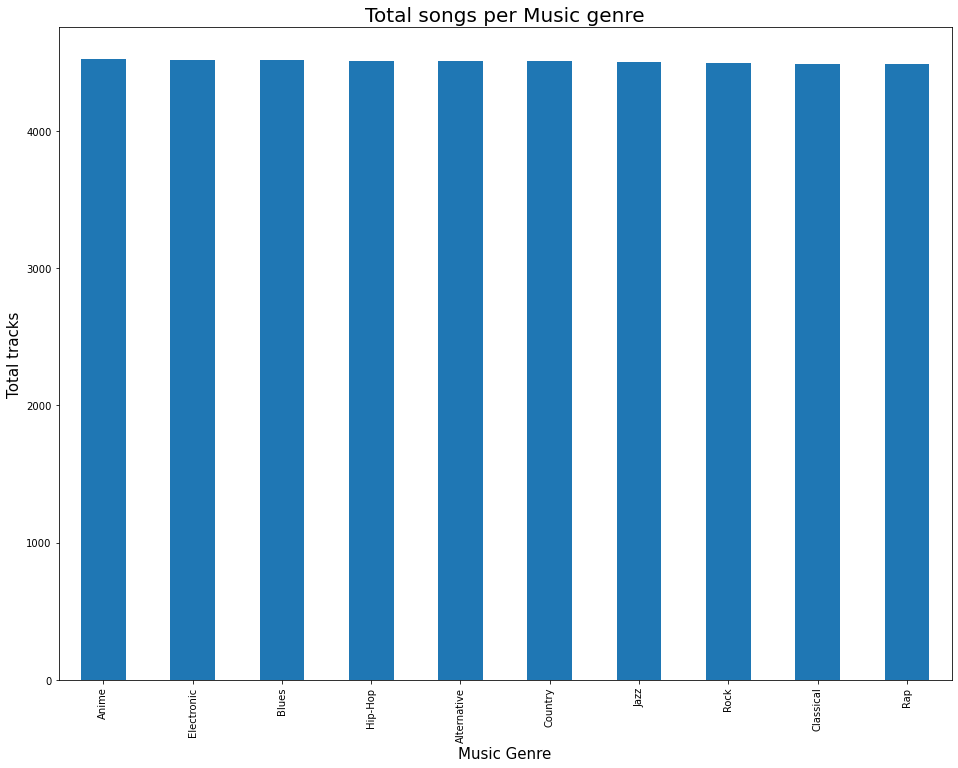

In [42]:
plt.figure(figsize = (16,12))
data_df["music_genre"].value_counts().plot.bar()

        
plt.title("Total songs per Music genre", fontsize = 20)
plt.xlabel("Music Genre", fontsize = 15)
plt.ylabel("Total tracks", fontsize = 15)

print(data_df["music_genre"].value_counts())